In [16]:
import serial
import numpy as np
import time

from matplotlib import pyplot as plt
%matplotlib inline

In [32]:
def measure(time_length, ymr=False):
    # time_length in seconds
    ser = serial.Serial('/dev/tty.AdafruitEZ-Link6761-SPP', 115200)
    ser.flushInput()
    ser.flushOutput()
    # ser.write('$VNWRG,07,100*6C\n')
    print(ser.readline())
    print(ser.readline())
    counter = 1
    max_counter = time_length * 100
    ax_list = []
    ay_list = []
    az_list = []
    time_list = []
    base = time.time()
    while counter <= max_counter:
        temp_line = ser.readline()
        temp_time = time.time() - base
        if counter == 1:
            counter += 1
            continue
        if ymr:
            temp_line_list = temp_line.split(",")
            ax_list.append(float(temp_line_list[7]))
            ay_list.append(float(temp_line_list[8]))
            az_list.append(float(temp_line_list[9]))
            time_list.append(temp_time)
        else:
            temp_line_list = temp_line[:-5].split(",")
            ax_temp = temp_line_list[1].replace("\x00", "")
            ay_temp = temp_line_list[2].replace("\x00", "")
            az_temp = temp_line_list[3].replace("\x00", "")
            ax_list.append(float(ax_temp))
            ay_list.append(float(ay_temp))
            az_list.append(float(az_temp))
            time_list.append(temp_time)
        counter += 1
    ser.close()
    return(time_list, ax_list, ay_list, az_list)

In [30]:
def VNChecksum(string):
    p = np.zeros((1,1),dtype='uint8');

    for i in range(0, len(string)):
        p = p ^ ord(string[i])
    CS = hex(p)
    return CS[2:].upper()

In [31]:
def cmd(string):
    ser = serial.Serial('/dev/tty.AdafruitEZ-Link6761-SPP', 115200)
    string = "$" + string + "*" + VNChecksum(string)
    ser.flushInput()
    ser.flushOutput()
    ser.write(string)
    ser.close()

$VNACC,-00.228,+00.097,-09.642*4F

$VNACC,-00.207,+00.092,-09.632*40



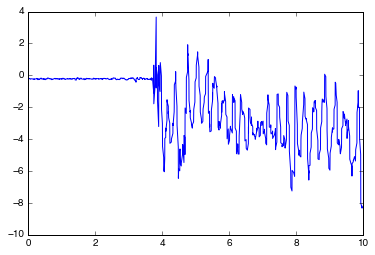

In [33]:
cmd('VNWRG,07,100')
cmd('VNWRG,06,11')
time_list, ax_list, ay_list, az_list = measure(10)
plt.plot(time_list, ax_list)
plt.show()